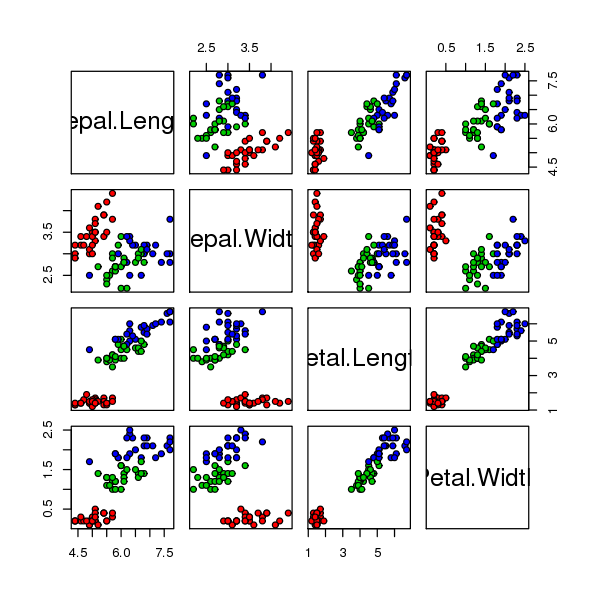

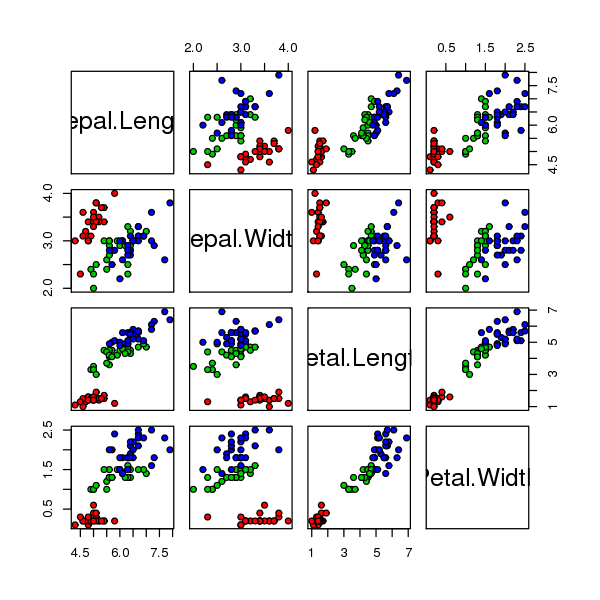

In [19]:
library("GGally")
library("nnet")
library("dplyr")

# dim(iris)
train.d <- iris %>% sample_n(75)
test.d <- iris[ -c(train.d%>%row.names%>%as.integer),]

pairs(train.d[1:4],pch = 21, bg = c("red", "green3", "blue")[unclass(train.d$Species)]) 
pairs(test.d[1:4],pch = 21, bg = c("red", "green3", "blue")[unclass(test.d$Species)]) 
# ggpairs(data = train.d,color="Species")
#ggpairs(data = test.d,color="Species",binwidth=1)

In [21]:
itr <- 100
iris.nnet <- nnet(Species~., size=3, data=train.d,maxit=itr)
# iris.nnet <- nnet(Species~., size=3, data=train.d,decay=0.1)
# summary(iris.nnet)
iris.train.pred <- predict(iris.nnet, train.d, type="class")
table(train.d$Species, iris.train.pred)

# Error-rate(Train)
errorrate.train <- train.d[train.d$Species!=iris.train.pred,] %>% nrow/nrow(train.d)

iris.pred <- predict(iris.nnet, test.d, type="class")
table(test.d$Species, iris.pred)

# Error-rate(Test)
errorrate.test <- test.d[test.d$Species==iris.pred,] %>% nrow/nrow(test.d)
data.frame(itr,errorrate.train,errorrate.test)

# weights:  27
initial  value 93.584147 
iter  10 value 79.766084
iter  20 value 33.806604
iter  30 value 31.865522
iter  40 value 5.907368
iter  50 value 0.936908
iter  60 value 0.026096
iter  70 value 0.001433
iter  80 value 0.000346
final  value 0.000080 
converged


            iris.train.pred
             setosa versicolor virginica
  setosa         27          0         0
  versicolor      0         25         0
  virginica       0          0        23

            iris.pred
             setosa versicolor virginica
  setosa         23          0         0
  versicolor      0         25         0
  virginica       0          3        24

,itr,errorrate.train,errorrate.test
1,100,0,0.96


In [73]:
nnet_itr <- function (train.d,test.d,itr){
	iris.nnet <- nnet(Species~., size=3, data=train.d,maxit=itr)
	iris.train.pred <- predict(iris.nnet, train.d, type="class")
	# Error-rate(Train)
	errorrate.train <- train.d[train.d$Species!=iris.train.pred,] %>% nrow/nrow(train.d)

	iris.pred <- predict(iris.nnet, test.d, type="class")
	# Error-rate(Test)
	errorrate.test <- test.d[test.d$Species!=iris.pred,] %>% nrow/nrow(test.d)
	return(
		data.frame(itr,errorrate.train,errorrate.test)
	)
}

train.d <- iris %>% sample_n(75)
test.d <- iris[ -c(train.d%>%row.names%>%as.integer),]
res <- data.frame()

In [77]:
for(itr in c(1:200)){
	res <- rbind(res,nnet_itr(train.d,test.d, itr))
}

# weights:  27
initial  value 118.666864 
final  value 116.162842 
stopped after 2 iterations
# weights:  27
initial  value 86.349801 
final  value 82.907391 
stopped after 2 iterations
# weights:  27
initial  value 87.810358 
final  value 76.404843 
stopped after 3 iterations
# weights:  27
initial  value 84.523624 
final  value 79.760663 
stopped after 4 iterations
# weights:  27
initial  value 94.703444 
final  value 61.811074 
stopped after 5 iterations
# weights:  27
initial  value 89.065181 
final  value 73.075207 
stopped after 6 iterations
# weights:  27
initial  value 77.288891 
final  value 10.855805 
stopped after 7 iterations
# weights:  27
initial  value 127.837360 
final  value 42.131695 
stopped after 8 iterations
# weights:  27
initial  value 92.898549 
final  value 34.721146 
stopped after 9 iterations
# weights:  27
initial  value 91.133293 
iter  10 value 17.196807
final  value 17.196807 
stopped after 10 iterations
# weights:  27
initial  value 85.757589 
iter  10 v

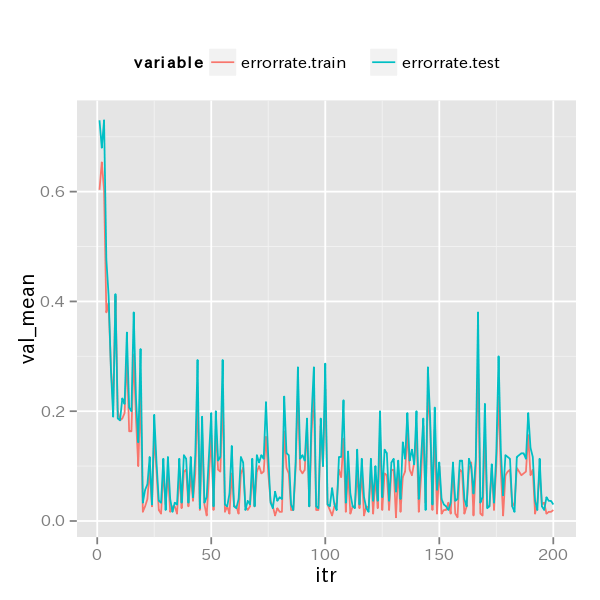

In [83]:
res %>% 
	melt(id.vars = "itr") %>% 
	group_by(variable,itr) %>% summarize(val_mean=mean(value)) %>%
	qplot(data=.,x=itr,y=val_mean,col=variable,geom="line")+theme(legend.position="top")

検証用集合の誤差が大きくなるところを出したかったが、誤差が増えなかった。

データ自体が分類しやすいデータだからか？